In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

(1024, 552, 3)
(2200, 1600, 3)


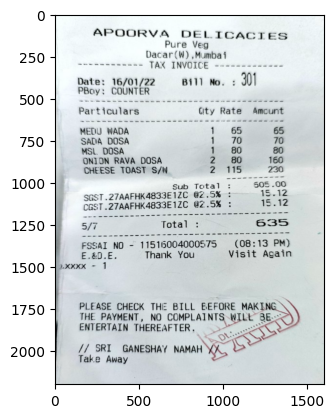

In [2]:
#image name is im_path and also we provided image path
im_path = "./bill.jpg"
#read image from path
img = cv2.imread(im_path)
print(img.shape)    #this will give us the shape of our image

#resise the image
img = cv2.resize(img, (1600,2200))

print(img.shape)

#if you want to know how this image looks like
plt.imshow(img)
plt.show()



#now since we know that opencv reads from bgr format
#so we have to convert this from BGR-->RGB (in ordeer to do that we can use built-in function)

In [3]:
#remove the noise
#edge detection
#contour extraction
#best contour selection
#project to the screen

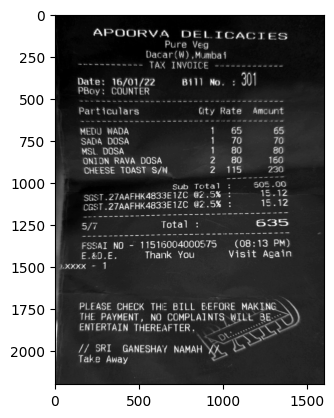

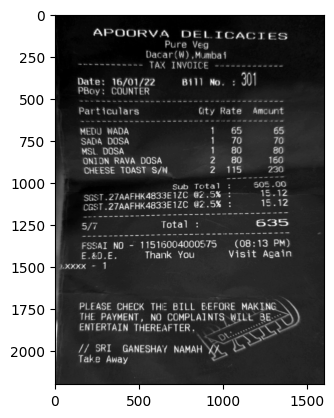

In [4]:
#removing the noise
#image blurring

orig = img.copy()
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray , cmap = "binary")
plt.show()

blurred = cv2.GaussianBlur(gray, (5,5) , 0)
plt.imshow(blurred , cmap = "binary")
plt.show()

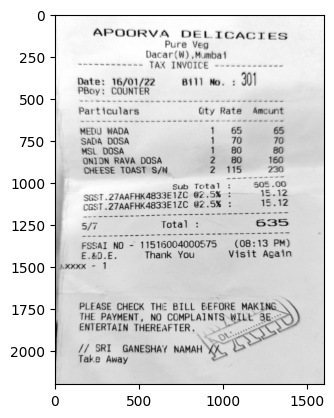

In [5]:
regen = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(orig)

plt.imshow(regen)
plt.show()

In [6]:
regen.shape

(2200, 1600, 3)

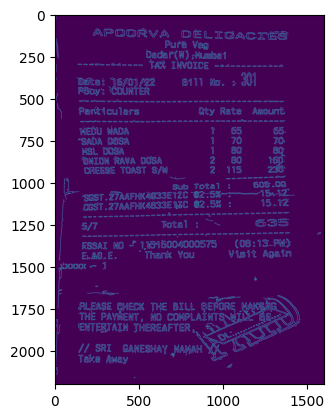

In [7]:
#edge detection

edge = cv2.Canny(blurred , 0, 50)
orig_edge = edge.copy()

plt.imshow(orig_edge)
plt.show()

In [8]:
#Contour Extraction

contours,_=cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))    #this give the count of contours

#now to sort the contours

contours = sorted( contours, reverse= True, key = cv2.contourArea )

3318


In [9]:
#selecting the best contour

for c in contours:
  p=cv2.arcLength(c, True)

  approx = cv2.approxPolyDP(c, 0.01*p, True)

  if len(approx) == 4:
    target = approx
    break

print(target.shape)



(4, 1, 2)


In [10]:
#reorder target contour

def reorder(h):

  h = h.reshape((4,2))
  print(h)

  hnew = np.zeros((4,2), dtype = np.float32 )

  add = h.sum(axis = 1)
  hnew[3] = h[np.argmax(add)]
  hnew[1] = h[np.argmax(add)]

  diff = np.diff(h, axis = 1)
  hnew[0] = h[np.argmax(add)]
  hnew[2] = h[np.argmax(add)]

  return hnew

In [11]:
reorder = reorder(target)
print("**************")
print(reorder)

[[1085 1919]
 [1004 1955]
 [ 923 1927]
 [1005 1955]]
**************
[[1085. 1919.]
 [1085. 1919.]
 [1085. 1919.]
 [1085. 1919.]]


In [12]:
#project to a fixed screen

input_representation = reorder

output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [13]:
M = cv2.getPerspectiveTransform(input_representation, output_map)

ans = cv2.warpPerspective(orig, M, (800, 800))

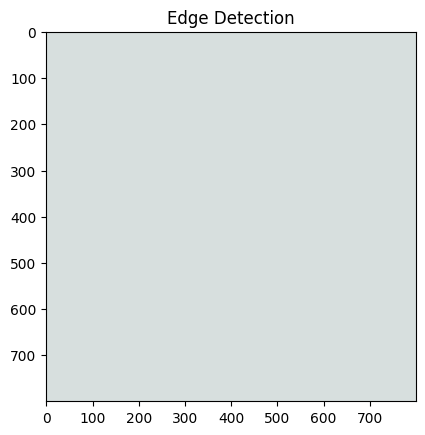

In [14]:
plt.imshow(ans)
plt.title("Edge Detection")
plt.show()